<a href="https://colab.research.google.com/github/Zachary-Fernandes/CSCI-6962/blob/main/fernazHW6v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 6
#####Zachary Fernandes
#####Projects in Machine Learning and AI

### Markov Decision Processes (MDP)

As demonstrated by [this article](https://towardsdatascience.com/real-world-applications-of-markov-decision-process-mdp-a39685546026), we can formulate a game show as an MDP. One round in this game involves asking a participant a question. If they answer correctly, they earn money, but if they answer incorrectly, they lose all their earned money. Answering correctly also means the participant can either choose to continue to the next round or quit and keep all their money. As rounds increase in number, their rewards also grow, but they become more and more challenging. For example, our game could last fifteen rounds

The state space would include each of the rounds along with an end game state.

The action space would be the choices a player can make, those being playing the next round or quitting.

The transition model would focus on what actions the player takes. If they play the next round, they may win or lose that round. Winning means moving to the next round with some probability _p_; the reward the player earns is how much is offered for the current round. If the player wins the last round, they earn the final prize and move to the end game state as no rounds remain. Losing means losing all their money and moving to the end game state with 1 - _p_ probability. If the player chooses to quit, they move to the end game state without any further reward and probability 1.

The reward is how much money a player earns for a correct answer. This reward increases as the round number increases. Additionally, as the reward value and round number increase, the probability of answering correctly decreases.

### Reinforcement Learning (RL) in Healthcare

One issue with healthcare that can be more effectively solved by RL is creating and configuring dynamic treatment regimes (DTRs). A DTR is, as put by [CapeStart](https://www.capestart.com/resources/blog/reinforcement-learning-in-health-care-why-its-important-and-how-it-can-help/), a sequence of rules that determine healthcare decisions, such as types of treatment, dosages of drugs, and timing of appointments. These are tailored to a specific patient based on medical history and conditions. For an RL algorithm, clinical observations and patient assessments would be its input data, and treatment options would be its output. This is done to reach the patient's most desired environmental state.

RL can help automate decision-making while treatment regimes proceed, design DTRs for chronic conditions, and improve critical care from intensive care data. One open-source approach to this problem is [pydtr](https://github.com/fullflu/pydtr). pydtr is a Python library that conducts DTRs, and it can select optimal treatments for specific patients with sklearn-based interfaces. It conducts these DTRs through a regression version of Iterative Q-Learning. It is possible to use sklearn-based models or statsmodels-based models - if one is using the sklearn model for a regression function and there are categorical independent variables, one must encode the categorical variables prior to using the model.

### Tic-Tac-Toe

This notebook can be seen as an extension of the previous notebook that features two RL agents training and testing against each other. This was an idea inspired by some articles I read while looking into this problem. Additionally, this notebook experiments with using punishments alongside rewards to discourage specific behaviors (draws and losses - the goal is to win).

Online Resources that Helped:

[Framing Tic-Tac-Toe as a Reinforcement Learning Problem](https://levelup.gitconnected.com/framing-tic-tac-toe-as-a-reinforcement-learning-problem-eb76b6ece4de)

[Setting up Tic-Tac-Toe for Reinforcement Learning in Python](https://levelup.gitconnected.com/setting-up-tic-tac-toe-for-reinforcement-learning-in-python-43e2f42cfce8)

[Tabular Q-Learning Agent vs. Irrational Agent in the Game of Tic-Tac-Toe](https://levelup.gitconnected.com/tabular-q-learning-agent-vs-irrational-agent-in-the-game-of-tic-tac-toe-6de6c85f0c42)

[Reinforcement Learning — Implement TicTacToe](https://towardsdatascience.com/reinforcement-learning-implement-tictactoe-189582bea542)

In [ ]:
!pip install imbalanced-learn
!pip install graphviz
!pip install tensorflow-probability

# to generate gifs
!pip install imageio
!pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-5_hja8rf
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-5_hja8rf
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=184426 sha256=3b9a12bf2984081c53a75aabc134124ba09d48c5068e2abe16b3239784515424
  Stored in directory: /tmp/pip-ephem-wheel-cache-uddi1iug/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [ ]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn import utils

import tensorflow as tf
from tensorflow import feature_column
from tensorflow import keras
import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import IPython
import IPython.display

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore")

import os
import zipfile

import glob
import imageio
import PIL
import tensorflow_probability as tfp
import time
import tensorflow_docs.vis.embed as embed

from scipy import ndimage, misc
import cv2

In [ ]:
def check_over(x, printFlag = 0):
    """
    Takes in the current board state x,
    and determines if the game is won by 
    any player or if there is a draw.    
    Returns True if episode is over. 
    Returns False if episode is not over. 
    Also, returns a string '1' if player 1
    has won, a string '2' if player 2 has
    won, or a string '3' if there is a draw. 
    """
    # Check if Player 1 won
    # First check each row
    # Then check each column
    # Finally check each diagonal
    if np.prod(x[0,:]) == 1 or np.prod(x[1,:]) == 1 or np.prod(x[2,:]) == 1 or \
        np.prod(x[:,0]) == 1 or np.prod(x[:,1]) == 1 or np.prod(x[:,2]) == 1 or \
        np.prod(np.diag(x)) == 1 or np.prod(np.diag(np.rot90(x))) == 1:
        if printFlag == 1:
            # Printing occurs during some testing
            # and human matches
            print("Player 1 won!")
        done = True
        player_win = '1'
        return done, player_win

    # Check if Player 2 won
    # First check each row
    # Then check each column
    # Finally check each diagonal
    if np.sum(x[0,:]) == 6 or np.sum(x[1,:]) == 6 or np.sum(x[2,:]) == 6 or \
        np.sum(x[:,0]) == 6 or np.sum(x[:,1]) == 6 or np.sum(x[:,2]) == 6 or \
        np.sum(np.diag(x)) == 6 or np.sum(np.diag(np.rot90(x))) == 6:
        if printFlag == 1:
            print("PLAYER 2 WON!")
        done = True
        player_win = '2'
        return done, player_win

    # Check if a draw occurred 
    if np.all(x):
        if printFlag == 1:
            print("Draw!")
        done = True
        player_win = 'd'
        return done, player_win
    
    # Match is not over
    return False, ' '

In [ ]:
# Player symbols - P1 = X, P2 = O
symbols = {1: 'X', 2: 'O'}

# Max number of state values per cell
max_vals = 3
# Max number of controls (actions)
max_controls = 9
# Create two Q-matrices
QvalsP1 = np.zeros((max_vals, max_vals, max_vals, max_vals, max_vals,
                  max_vals, max_vals, max_vals, max_vals, max_controls))
QvalsP2 = np.zeros((max_vals, max_vals, max_vals, max_vals, max_vals,
                  max_vals, max_vals, max_vals, max_vals, max_controls))

In [ ]:
alphaP1 = 0.9
gammaP1 = 0.99
epsilonP1 = 1.0

alphaP2 = 0.9
gammaP2 = 0.99
epsilonP2 = 1.0

epochs = 100000

winP1 = np.zeros((epochs,))
winP2 = np.zeros((epochs,))
draw = np.zeros((epochs,))

decayStages = 20
stageLength = epochs // decayStages

decayFactor = 0.7

In [ ]:
print('Q-table: ', QvalsP1.shape)

Q-table:  (3, 3, 3, 3, 3, 3, 3, 3, 3, 9)


In [ ]:
def control_train(x, epsilon, controls, Qvals):
    if np.random.random() >= epsilon:
        # Exploitation
        u = np.argmax(Qvals[x])

        if u not in controls:
            new_control = np.random.choice(list(controls))
            return new_control
        else:
            return u
    else:
        # Exploration
        u = np.random.choice(list(controls))
        return u

In [ ]:
# This function is 
def control_test(x, controls, Qvals):
    u = np.argmax(Qvals[x])
    
    if u not in controls:
        new_control = np.random.choice(list(controls))
        return new_control
    else:
        return u

In [ ]:
def decay_epsilon(episode, epsilon, stageLength, decayFactor):
    if episode % stageLength == 0 and episode != 0:
        epsilon *= decayFactor
        print(f'epsilon = {epsilon}')
    return epsilon

In [ ]:
def reset():
    controls = set()
    for i in range(9):
        controls.add(i)
    return controls

In [ ]:
def batch_update(statesRL, controlsRL, r, nextStatesRL, gamma, alpha, Qvals):
    for i, boardVals in enumerate(statesRL):
        u = controlsRL[i]
        boardValsNext = nextStatesRL[i]
        td_target = r + gamma * np.max(Qvals[boardValsNext])
        td_error = td_target - Qvals[boardVals][u]
        Qvals[boardVals][u] += alpha * td_error
    return Qvals

In [ ]:
reward = 10

for epoch in range(epochs):
    if epoch % 1000 == 0:
        print(epoch)
    statesRLP1 = []
    controlsRLP1 = []
    nextStatesRLP1 = []

    statesRLP2 = []
    controlsRLP2 = []
    nextStatesRLP2 = []

    done = False
    controls = reset()

    boardVals = np.zeros((3,3))
    turn = 0

    board = np.array([[' ', ' ', ' '],
                      [' ', ' ', ' '],
                      [' ', ' ', ' ']])
    epsilonP1 = decay_epsilon(epoch, epsilonP1, stageLength, decayFactor)
    epsilonP2 = decay_epsilon(epoch, epsilonP2, stageLength, decayFactor)

    while done != True:
        if turn % 2 == 0:
            # P1 turn - RL agent 2
            u = control_train(tuple(boardVals.reshape(-1,).astype(int)),
                              epsilonP1, controls, QvalsP1)
            statesRLP1.append(tuple(boardVals.reshape(-1,).astype(int)))
            controlsRLP1.append(u)
            controls.remove(u)

            boardValsNext = boardVals.reshape(-1,)
            boardValsNext[u] = 1
            boardValsNext = boardValsNext.reshape(3,3)
            nextStatesRLP1.append(tuple(boardValsNext.reshape(-1,).astype(int)))

            board = board.reshape(-1,)
            board[u] = symbols[1]
            board = board.reshape(3,3)

            done, winner = check_over(boardVals)
            if done == True:
                if winner == '1':
                    Qvals = batch_update(statesRLP1,
                                         controlsRLP1,
                                         reward,
                                         nextStatesRLP1,
                                         gammaP1,
                                         alphaP1,
                                         QvalsP1)
                    winP1[epoch] = 1
                elif winner == 'd':
                    Qvals = batch_update(statesRLP1,
                                         controlsRLP1,
                                         -5,
                                         nextStatesRLP1,
                                         gammaP1,
                                         alphaP1,
                                         QvalsP1)
                    draw[epoch] = 1
                else:
                    Qvals = batch_update(statesRLP1,
                                         controlsRLP1,
                                         -50,
                                         nextStatesRLP1,
                                         gammaP1,
                                         alphaP1,
                                         QvalsP1)
            boardVals = boardValsNext
            turn += 1
        else:
            # P2 - RL agent 2
            u = control_train(tuple(boardVals.reshape(-1,).astype(int)),
                              epsilonP2, controls, QvalsP2)
            statesRLP2.append(tuple(boardVals.reshape(-1,).astype(int)))
            controlsRLP2.append(u)
            controls.remove(u)

            boardValsNext = boardVals.reshape(-1,)
            boardValsNext[u] = 2
            boardValsNext = boardValsNext.reshape(3,3)
            nextStatesRLP2.append(tuple(boardValsNext.reshape(-1,).astype(int)))

            board = board.reshape(-1,)
            board[u] = symbols[2]
            board = board.reshape(3,3)

            done, winner = check_over(boardVals)
            if done == True:
                if winner == '2':
                    Qvals = batch_update(statesRLP2,
                                         controlsRLP2,
                                         reward,
                                         nextStatesRLP2,
                                         gammaP2,
                                         alphaP2,
                                         QvalsP2)
                    winP2[epoch] = 1
                elif winner == 'd':
                    Qvals = batch_update(statesRLP1,
                                         controlsRLP1,
                                         5,
                                         nextStatesRLP1,
                                         gammaP1,
                                         alphaP1,
                                         QvalsP1)
                    draw[epoch] = 1
                else:
                    Qvals = batch_update(statesRLP1,
                                         controlsRLP1,
                                         -50,
                                         nextStatesRLP1,
                                         gammaP1,
                                         alphaP1,
                                         QvalsP1)
            boardVals = boardValsNext
            turn += 1

0
1000
2000
3000
4000
5000
epsilon = 0.7
epsilon = 0.7
6000
7000
8000
9000
10000
epsilon = 0.48999999999999994
epsilon = 0.48999999999999994
11000
12000
13000
14000
15000
epsilon = 0.3429999999999999
epsilon = 0.3429999999999999
16000
17000
18000
19000
20000
epsilon = 0.24009999999999992
epsilon = 0.24009999999999992
21000
22000
23000
24000
25000
epsilon = 0.16806999999999994
epsilon = 0.16806999999999994
26000
27000
28000
29000
30000
epsilon = 0.11764899999999995
epsilon = 0.11764899999999995
31000
32000
33000
34000
35000
epsilon = 0.08235429999999996
epsilon = 0.08235429999999996
36000
37000
38000
39000
40000
epsilon = 0.05764800999999997
epsilon = 0.05764800999999997
41000
42000
43000
44000
45000
epsilon = 0.04035360699999998
epsilon = 0.04035360699999998
46000
47000
48000
49000
50000
epsilon = 0.028247524899999984
epsilon = 0.028247524899999984
51000
52000
53000
54000
55000
epsilon = 0.019773267429999988
epsilon = 0.019773267429999988
56000
57000
58000
59000
60000
epsilon = 0.01384

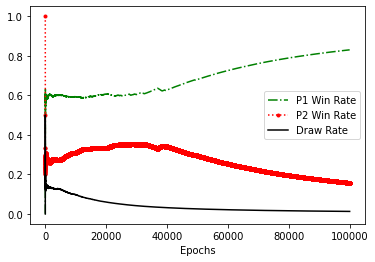

In [ ]:
winTotP1 = np.cumsum(winP1)
winTotP2 = np.cumsum(winP2)
drawTot = np.cumsum(draw)

winRateP1 = np.zeros(epochs,)
winRateP2 = np.zeros(epochs,)
drawRate = np.zeros(epochs,)

for e in range(epochs):
    winRateP1[e] = winTotP1[e] / (e + 1)
    winRateP2[e] = winTotP2[e] / (e + 1)
    drawRate[e] = drawTot[e] / (e + 1)

plt.figure()
plt.plot(np.arange(epochs), winRateP1, 'g-.', label = 'P1 Win Rate')
plt.plot(np.arange(epochs), winRateP2, 'r:.', label = 'P2 Win Rate')
plt.plot(np.arange(epochs), drawRate, 'k-', label = 'Draw Rate')
plt.xlabel('Epochs')
plt.legend()

In [ ]:
winRateP1[-1]

0.83005

In [ ]:
winRateP2[-1]

0.15728

In [ ]:
drawRate[-1]

0.01267

In [ ]:
winRateP1[-1] + winRateP2[-1] + drawRate[-1]

0.9999999999999999

In [ ]:
def test(Qvals, epochs):
    winP1 = 0
    winP2 = 0
    draw = 0
    symbols = {1: 'X', 2: 'O'}

    for epoch in range(epochs):
        done = False
        controls = reset()

        boardVals = np.zeros((3,3))
        turn = 0

        board = np.array([[' ', ' ', ' '],
                          [' ', ' ', ' '],
                          [' ', ' ', ' ']])

        if epoch % (epochs // 5) == 0:
            print(f'Episode {epoch}, turn = {turn}, \n', board)

        while done != True:
            if turn % 2 == 0:
                # P1 = RL agent 1
                u = control_test(tuple(boardVals.reshape(-1,).astype(int)),
                                 controls, Qvals)
                controls.remove(u)

                boardValsNext = boardVals.reshape(-1,)
                boardValsNext[u] = 1
                boardValsNext = boardValsNext.reshape(3,3)

                board = board.reshape(-1,)
                board[u] = symbols[1]
                board = board.reshape(3,3)

                boardVals = boardValsNext
                turn += 1

                if epoch % (epochs // 5) == 0:
                    print(f'Episode {epoch}, turn = {turn}, \n', board)
                    done, winner = check_over(boardVals, 1)
                else:
                    done, winner = check_over(boardVals)
                
                if done:
                    if winner == '1':
                        winP1 += 1
                    elif winner == '2':
                        winP2 += 1
                    elif winner == 'd':
                        draw += 1
                
            else:
                # P2 - RL agent 2
                u = np.random.choice(list(controls))
                controls.remove(u)

                boardVals = boardVals.reshape(-1,)
                boardVals[u] = 2
                boardVals = boardVals.reshape(3,3)

                board = board.reshape(-1,)
                board[u] = symbols[2]
                board = board.reshape(3,3)
                turn += 1

                if epoch % (epochs // 5) == 0:
                    print(f'Episode {epoch}, turn = {turn}, \n', board)
                    done, winner = check_over(boardVals, 1)
                else:
                    done, winner = check_over(boardVals)

                if done:
                    if winner == '1':
                        winP1 += 1
                    elif winner == '2':
                        winP2 += 1
                    elif winner == 'd':
                        draw += 1

    winRateP1 = winP1 / epochs
    winRateP2 = winP2 / epochs
    drawRate = draw / epochs

    return winRateP1, winRateP2, drawRate

In [ ]:
testEpochs = 10000
winRateP1, winRateP2, drawRate = test(QvalsP1, testEpochs)

Episode 0, turn = 0, 
 [[' ' ' ' ' ']
 [' ' ' ' ' ']
 [' ' ' ' ' ']]
Episode 0, turn = 1, 
 [[' ' ' ' ' ']
 [' ' 'X' ' ']
 [' ' ' ' ' ']]
Episode 0, turn = 2, 
 [[' ' ' ' ' ']
 [' ' 'X' 'O']
 [' ' ' ' ' ']]
Episode 0, turn = 3, 
 [[' ' ' ' ' ']
 [' ' 'X' 'O']
 ['X' ' ' ' ']]
Episode 0, turn = 4, 
 [[' ' ' ' ' ']
 [' ' 'X' 'O']
 ['X' 'O' ' ']]
Episode 0, turn = 5, 
 [[' ' ' ' 'X']
 [' ' 'X' 'O']
 ['X' 'O' ' ']]
PLAYER 1 WON!
Episode 2000, turn = 0, 
 [[' ' ' ' ' ']
 [' ' ' ' ' ']
 [' ' ' ' ' ']]
Episode 2000, turn = 1, 
 [[' ' ' ' ' ']
 [' ' 'X' ' ']
 [' ' ' ' ' ']]
Episode 2000, turn = 2, 
 [[' ' ' ' ' ']
 ['O' 'X' ' ']
 [' ' ' ' ' ']]
Episode 2000, turn = 3, 
 [[' ' ' ' 'X']
 ['O' 'X' ' ']
 [' ' ' ' ' ']]
Episode 2000, turn = 4, 
 [['O' ' ' 'X']
 ['O' 'X' ' ']
 [' ' ' ' ' ']]
Episode 2000, turn = 5, 
 [['O' ' ' 'X']
 ['O' 'X' ' ']
 [' ' ' ' 'X']]
Episode 2000, turn = 6, 
 [['O' 'O' 'X']
 ['O' 'X' ' ']
 [' ' ' ' 'X']]
Episode 2000, turn = 7, 
 [['O' 'O' 'X']
 ['O' 'X' ' ']
 [' ' 'X' 'X

In [ ]:
winRateP1

0.8986

In [ ]:
winRateP2

In [ ]:
drawRate

0.0071

In [ ]:
winRateP1 + winRateP2 + drawRate

0.9999999999999999

In [ ]:
def testHuman(Qvals):
    winP1 = 0
    winP2 = 0
    draw = 0
    symbols = {1: 'X', 2: 'O'}
    round = 0

    while int(input('Play (input 1) or exit (input 0)? ')) != 0:
        round += 1
        print('Round', round)
        done = False
        controls = reset()

        boardVals = np.zeros((3,3))
        turn = 0

        board = np.array([[' ', ' ', ' '],
                          [' ', ' ', ' '],
                          [' ', ' ', ' ']])

        print(f'Turn = {turn}, \n', board)

        while done != True:
            if turn % 2 == 0:
                # P1 - RL agent 1
                u = control_test(tuple(boardVals.reshape(-1,).astype(int)),
                                 controls, Qvals)
                controls.remove(u)

                boardValsNext = boardVals.reshape(-1,)
                boardValsNext[u] = 1
                boardValsNext = boardValsNext.reshape(3,3)

                board = board.reshape(-1,)
                board[u] = symbols[1]
                board = board.reshape(3,3)

                boardVals = boardValsNext
                turn += 1

                print(f'Turn = {turn}, \n', board)

                done, winner = check_over(boardVals, 1)
                if done:
                    if winner == '1':
                        winP1 += 1
                    elif winner == '2':
                        winP2 += 1
                    elif winner == 'd':
                        draw += 1

            else:
                # P2 - human
                u = int(input('Enter a square to place O (1-9): ')) - 1
                controls.remove(u)

                boardVals = boardVals.reshape(-1,)
                boardVals[u] = 2
                boardVals = boardVals.reshape(3,3)

                board = board.reshape(-1,)
                board[u] = symbols[2]
                board = board.reshape(3,3)
                turn += 1

                print(f'Turn = {turn}, \n', board)

                done, winner = check_over(boardVals, 1)
                if done:
                    if winner == '1':
                        winP1 += 1
                    elif winner == '2':
                        winP2 += 1
                    elif winner == 'd':
                        draw += 1
    print('Game Over')
    return winP1, winP2, draw, round

In [321]:

print('Welcome to Tic-Tac-Toe! AI is P1, you are P2.')
winP1, winP2, draw, rounds = testHuman(QvalsP1)

if rounds == 0:
    print('No games played; no stats reported.')
else:
    winRateP1 = winP1 / rounds
    winRateP2 = winP2 / rounds
    drawRate = draw / rounds
    print('Rounds:       ', rounds)
    print('AI Wins:      ', winP1)
    print('AI Win Rate:  ', winRateP1)
    print('Your Wins:    ', winP2)
    print('Your Win Rate:', winRateP2)
    print('Draws:        ', draw)
    print('Draw Rate:    ', drawRate)

Welcome to Tic-Tac-Toe! AI is P1, you are P2.
Play (input 1) or exit (input 0)? 1
Round 1
Turn = 0, 
 [[' ' ' ' ' ']
 [' ' ' ' ' ']
 [' ' ' ' ' ']]
Turn = 1, 
 [[' ' ' ' ' ']
 [' ' 'X' ' ']
 [' ' ' ' ' ']]
Enter a square to place O (1-9): 4
Turn = 2, 
 [[' ' ' ' ' ']
 ['O' 'X' ' ']
 [' ' ' ' ' ']]
Turn = 3, 
 [[' ' ' ' 'X']
 ['O' 'X' ' ']
 [' ' ' ' ' ']]
Enter a square to place O (1-9): 7
Turn = 4, 
 [[' ' ' ' 'X']
 ['O' 'X' ' ']
 ['O' ' ' ' ']]
Turn = 5, 
 [['X' ' ' 'X']
 ['O' 'X' ' ']
 ['O' ' ' ' ']]
Enter a square to place O (1-9): 9
Turn = 6, 
 [['X' ' ' 'X']
 ['O' 'X' ' ']
 ['O' ' ' 'O']]
Turn = 7, 
 [['X' 'X' 'X']
 ['O' 'X' ' ']
 ['O' ' ' 'O']]
PLAYER 1 WON!
Play (input 1) or exit (input 0)? 1
Round 2
Turn = 0, 
 [[' ' ' ' ' ']
 [' ' ' ' ' ']
 [' ' ' ' ' ']]
Turn = 1, 
 [[' ' ' ' ' ']
 [' ' 'X' ' ']
 [' ' ' ' ' ']]
Enter a square to place O (1-9): 3
Turn = 2, 
 [[' ' ' ' 'O']
 [' ' 'X' ' ']
 [' ' ' ' ' ']]
Turn = 3, 
 [[' ' ' ' 'O']
 [' ' 'X' ' ']
 [' ' 'X' ' ']]
Enter a square t